In [1]:
from google.colab import files
uploaded = files.upload()

Saving test_data.xlsx to test_data.xlsx
Saving train_data.xlsx to train_data.xlsx


In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the training data
train_df = pd.read_excel('train_data.xlsx')

In [4]:
# Display the first few rows of the dataframe
train_df.head()

customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0       7200       Individual       253.99            Verified         4648   
1       6000       Individual       233.52     Source Verified        14051   
2       8000       Individual       287.50            Verified        14885   
3      10000       Individual       336.22     Source Verified         7542   
4      10000       Individual       237.80            Verified         6318   

   emp_length  loan_status  
0          11            0  
1          11            1  
2          11            0  
3           2            1  
4          11            0

In [5]:
# Data Info: Check for missing values and data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

In [6]:
# Data Summary: Describe the numeric columns to get a summary of statistics
train_df.describe()

customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   
50%           0.000000  6.000000e+04      14.990000   13300.000000   
75%           0.000000  8.500000e+04      17.860000   20225.000000   
max          10.000000  8.900060e+06      28.990000   40000.000000   
std           0.647328  6.050616e+04       3.234215    9091.279851   

         installment    account_bal     emp_length    loan_status  
count  113705.000000  113705.000000  113705.000000  113705.000000  
mean      454.241150   15820.487094       5.959782       0.738895  
min        33.240000       0.000000       0.000000       0.000000  
25%       265.740000    5656.000000       2.000000       0.000000  
50%       388.290000   10841.000000       6.000000       1.000000  
75%       599.530000   19682.000000      11.000000       1.000000  
max      1460.430000  875598.000000      11.000000       1.000000  
std       268.251678   20447.614824       4.229570       0.439239

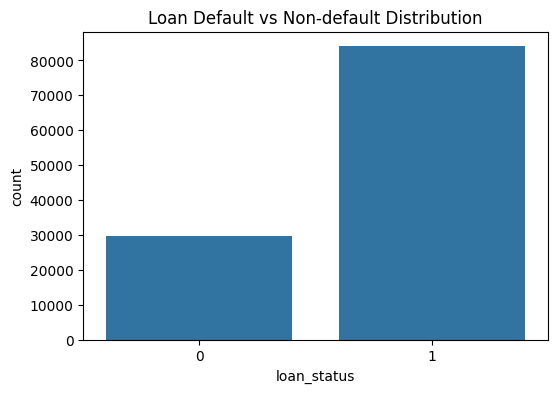

In [7]:
# 1. Loan Default vs Non-Default Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=train_df)
plt.title('Loan Default vs Non-default Distribution')
plt.show()

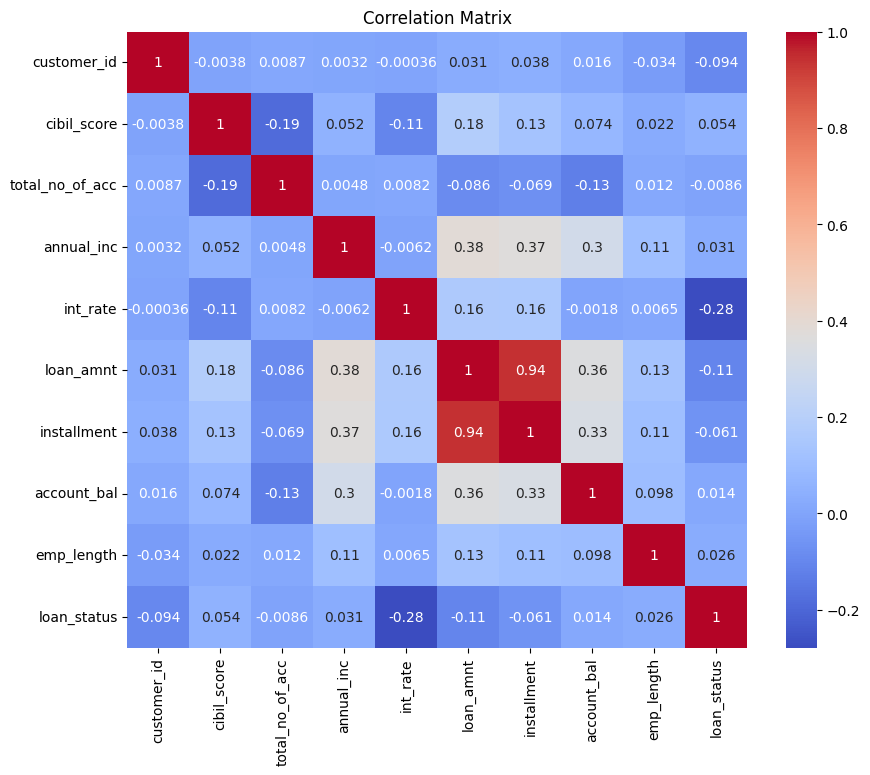

In [9]:
# 2. Correlation Heatmap
plt.figure(figsize=(10,8))
# Select only numeric columns for correlation calculation
numeric_df = train_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

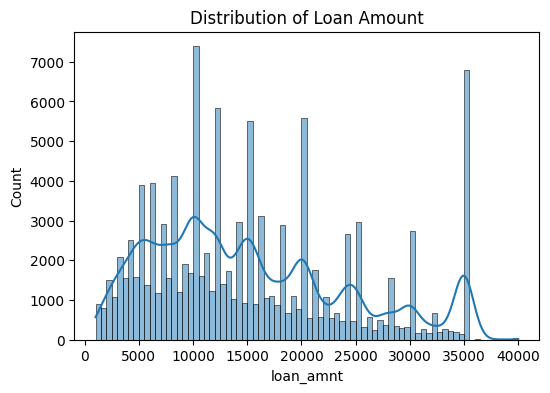

In [10]:
# 4. Distribution of Loan Amount
plt.figure(figsize=(6,4))
sns.histplot(train_df['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

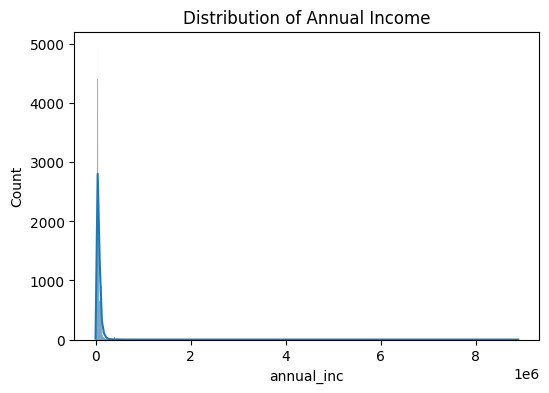

In [11]:
# 5. Distribution of Annual Income
plt.figure(figsize=(6,4))
sns.histplot(train_df['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

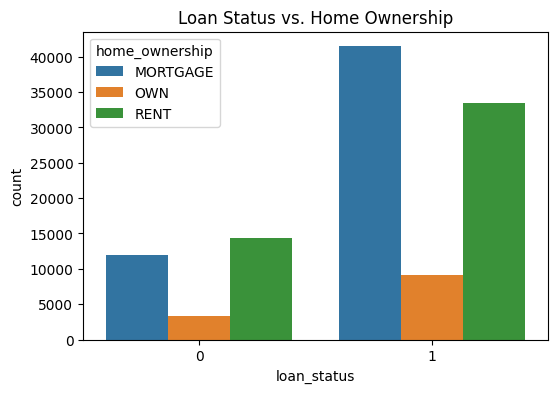

In [12]:
# 6. Loan Status vs. Home Ownership
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', hue='home_ownership', data=train_df)
plt.title('Loan Status vs. Home Ownership')
plt.show()

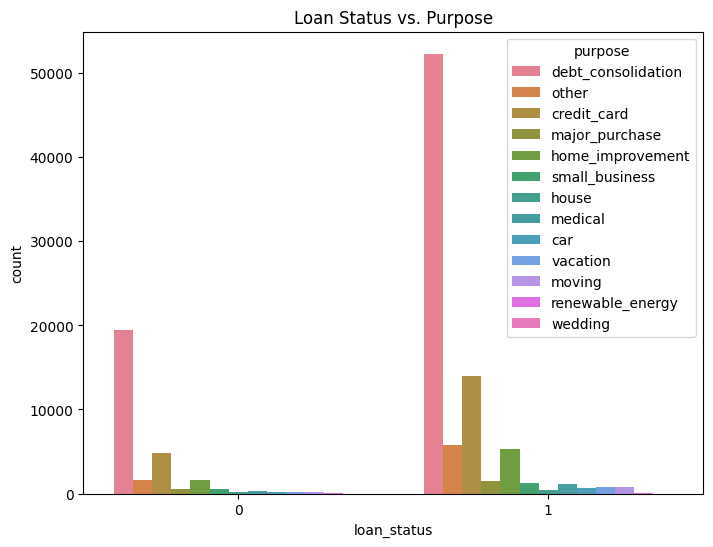

In [14]:
# 7. Loan Status vs. Purpose
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', hue='purpose', data=train_df)
plt.title('Loan Status vs. Purpose')
plt.show()

In [15]:
# Check missing values again to decide handling strategy
train_df.isnull().sum()

customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64